<a href="https://colab.research.google.com/github/abishek151/Coding-/blob/main/Student_Permormace_predecton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading and Reading DAta

In [ ]:
import gdown
dataset_url = "https://drive.google.com/uc?export=download&id=1aliGIVyhIiYgCpTU6xi9KQgDU2AMVFIV"
filename = "student-por.csv"
gdown.download(dataset_url, filename)

Downloading...
From: https://drive.google.com/uc?export=download&id=1aliGIVyhIiYgCpTU6xi9KQgDU2AMVFIV
To: /content/student-por.csv
100%|██████████| 57.0k/57.0k [00:00<00:00, 14.3MB/s]


'student-por.csv'

In [ ]:
dataset_url = "https://drive.google.com/uc?export=download&id=1hiLiLcCLPsmlbArLWHHEtPlr48XFAoMr"
filename = "student-mat.csv"
gdown.download(dataset_url, filename)

Downloading...
From: https://drive.google.com/uc?export=download&id=1hiLiLcCLPsmlbArLWHHEtPlr48XFAoMr
To: /content/student-mat.csv
100%|██████████| 93.2k/93.2k [00:00<00:00, 70.8MB/s]


'student-mat.csv'

#Creating Data frames

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_mat = pd.read_csv('/content/student-mat.csv',sep=';')
df_por = pd.read_csv('/content/student-por.csv',sep=';')

In [ ]:
df = pd.concat([df_mat, df_por])

In [ ]:
df.shape

(1044, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

Here we can see the data type of some columns are object so we need to change them to integere

I change the name of the columns so it is easy to understand

In [ ]:
df.columns = df.columns.str.capitalize()
df.rename(columns={'Famsize': 'Family Size',
                   'Pstatus': 'Parent Cohabitation Status',
                   'Medu': 'Mother Education',
                   'Fedu': 'Father Education',
                   'Mjob': 'Mother Job',
                   'Fjob': 'Father Job',
                   'Traveltime': 'Travel Time',
                   'Studytime': 'Study Time',
                   'Schoolsup': 'Extra Educational Support',
                   'Famsup': 'Family Educational Support',
                   'Paid': 'Extra Paid Course',
                   'Activities': 'Extracurricular Activities',
                   'Nursery': 'Attending Nursery School',
                   'Higher': 'Wants To Take Higher Ed',
                   'Internet': 'Internet Access',
                   'Romantic': 'Romantic Relationship',
                   'Famrel': 'Family Relationship',
                   'Freetime': 'Free Time After School',
                   'Goout': 'Going Out With Friends',
                   'Dalc': 'Workday Alcohol Consumption',
                   'Walc': 'Weekend Alcohol Consumption',
                   'Health': 'Current Health Status',
                   'Absences': 'Number of School Absences',
                   'G1': 'First Period Grade ',
                   'G2': 'Second Period Grade ',
                   'G3': 'Final Grade '
                   }, inplace=True)

#Preprocessing data

Installing fast_ml pcakage this will help to display the data type, its group and unique values

In [ ]:
pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fast_ml import eda
from fast_ml.utilities import display_all

In [ ]:
display_all(eda.df_info(df))

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
School,object,Categorical,2,"[GP, MS]",0,0.0
Sex,object,Categorical,2,"[F, M]",0,0.0
Age,int64,Numerical,8,"[18, 17, 15, 16, 19, 22, 20, 21]",0,0.0
Address,object,Categorical,2,"[U, R]",0,0.0
Family Size,object,Categorical,2,"[GT3, LE3]",0,0.0
Parent Cohabitation Status,object,Categorical,2,"[A, T]",0,0.0
Mother Education,int64,Numerical,5,"[4, 1, 3, 2, 0]",0,0.0
Father Education,int64,Numerical,5,"[4, 1, 2, 3, 0]",0,0.0
Mother Job,object,Categorical,5,"[at_home, health, other, services, teacher]",0,0.0
Father Job,object,Categorical,5,"[teacher, other, services, health, at_home]",0,0.0


For machine learning we need to convert the object data type to integer which can be done by Label Encoder for which i use following function

In [ ]:
from sklearn import *
for i in df.iloc[:,:-3]:
    if df[i].dtypes=='object':
        df[i]=preprocessing.LabelEncoder().fit_transform(df[[i]])
    else:
        df[i]=preprocessing.StandardScaler().fit_transform(df[[i]])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [ ]:
df.head()

,School,Sex,Age,Address,Family Size,Parent Cohabitation Status,Mother Education,Father Education,Mother Job,Father Job,...,Family Relationship,Free Time After School,Going Out With Friends,Workday Alcohol Consumption,Weekend Alcohol Consumption,Current Health Status,Number of School Absences,First Period Grade,Second Period Grade,Final Grade
0,0,0,1.027889,1,0,0,1.242077,1.466302,0,4,...,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,-0.070060,0,11,11
1,0,0,0.221035,1,0,1,-1.426089,-1.262431,0,2,...,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.392275,9,11,11
2,0,0,-1.392674,1,1,1,-1.426089,-1.262431,0,2,...,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.252155,12,13,12
3,0,0,-1.392674,1,0,1,1.242077,-0.352853,1,3,...,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.714489,14,14,14
4,0,0,-0.585820,1,0,1,0.352689,0.556724,2,2,...,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.714489,11,13,13


In [ ]:
display_all(eda.df_info(df))

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
School,int64,Numerical,2,"[0, 1]",0,0.0
Sex,int64,Numerical,2,"[0, 1]",0,0.0
Age,float64,Numerical,8,"[1.0278894669433536, 0.22103487785398448, -1.3...",0,0.0
Address,int64,Numerical,2,"[1, 0]",0,0.0
Family Size,int64,Numerical,2,"[0, 1]",0,0.0
Parent Cohabitation Status,int64,Numerical,2,"[0, 1]",0,0.0
Mother Education,float64,Numerical,5,"[1.2420774405755364, -1.4260889132533936, 0.35...",0,0.0
Father Education,float64,Numerical,5,"[1.4663021565227787, -1.2624312684500927, -0.3...",0,0.0
Mother Job,int64,Numerical,5,"[0, 1, 2, 3, 4]",0,0.0
Father Job,int64,Numerical,5,"[4, 2, 3, 1, 0]",0,0.0


In [ ]:
df['total grade'] = round((df['First Period Grade ']+df['Second Period Grade ']+df['Final Grade '])/3)

In [ ]:
df.drop(['First Period Grade ','Second Period Grade ','Final Grade '],axis=1,inplace=True)

In [ ]:
df.head()

,School,Sex,Age,Address,Family Size,Parent Cohabitation Status,Mother Education,Father Education,Mother Job,Father Job,...,Internet Access,Romantic Relationship,Family Relationship,Free Time After School,Going Out With Friends,Workday Alcohol Consumption,Weekend Alcohol Consumption,Current Health Status,Number of School Absences,total grade
0,0,0,1.027889,1,0,0,1.242077,1.466302,0,4,...,0,0,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,-0.070060,7.0
1,0,0,0.221035,1,0,1,-1.426089,-1.262431,0,2,...,1,0,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.392275,10.0
2,0,0,-1.392674,1,1,1,-1.426089,-1.262431,0,2,...,1,0,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.252155,12.0
3,0,0,-1.392674,1,0,1,1.242077,-0.352853,1,3,...,1,1,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.714489,14.0
4,0,0,-0.585820,1,0,1,0.352689,0.556724,2,2,...,0,0,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.714489,12.0


In [ ]:
for i in df.index:
    if (df['total grade'][i]>=10).any():
        df['total grade'][i]=1
    else:
        df['total grade'][i]=0

Streaming output truncated to the last 5000 lines.
<ipython-input-222-25ca1d249b4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total grade'][i]=1
<ipython-input-222-25ca1d249b4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total grade'][i]=1
<ipython-input-222-25ca1d249b4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total grade'][i]=1
<ipython-input-222-25ca1d249b4e>:3: SettingWithCopyWarning: 
A value is t

Changing total grade as pass with 1 which values is  greater than 10 and remaining as 0





#Checking for outliers

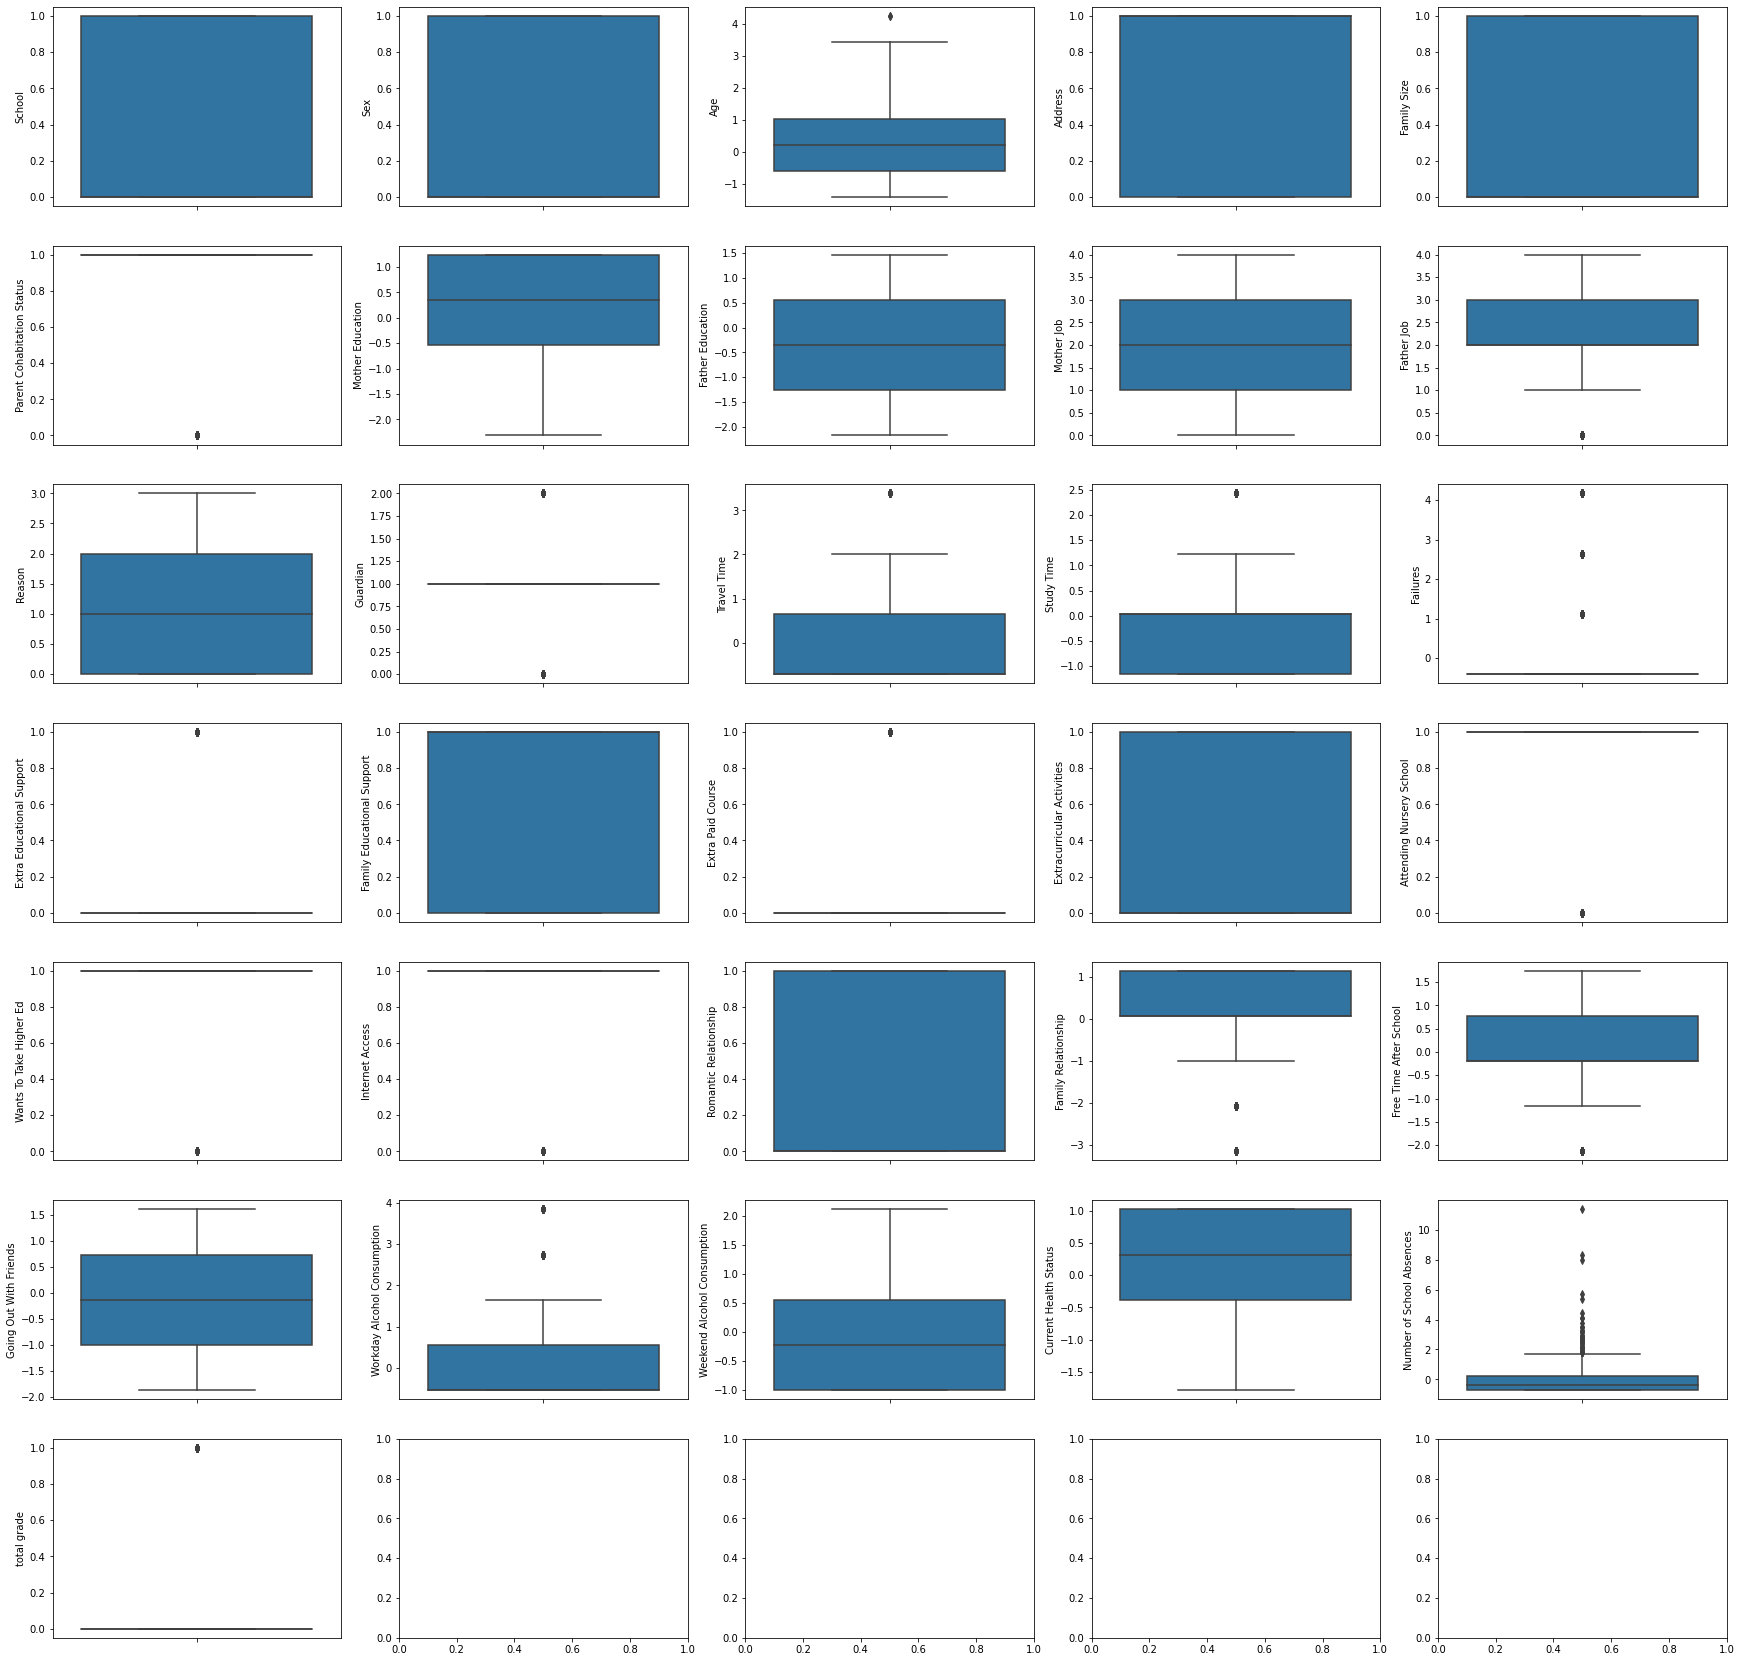

In [ ]:
fig, axes = plt.subplots(ncols = 5, nrows = 7, figsize = (30, 30))
index = 0
ax = axes.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

We can see some colums contains outliers so we need to handle them

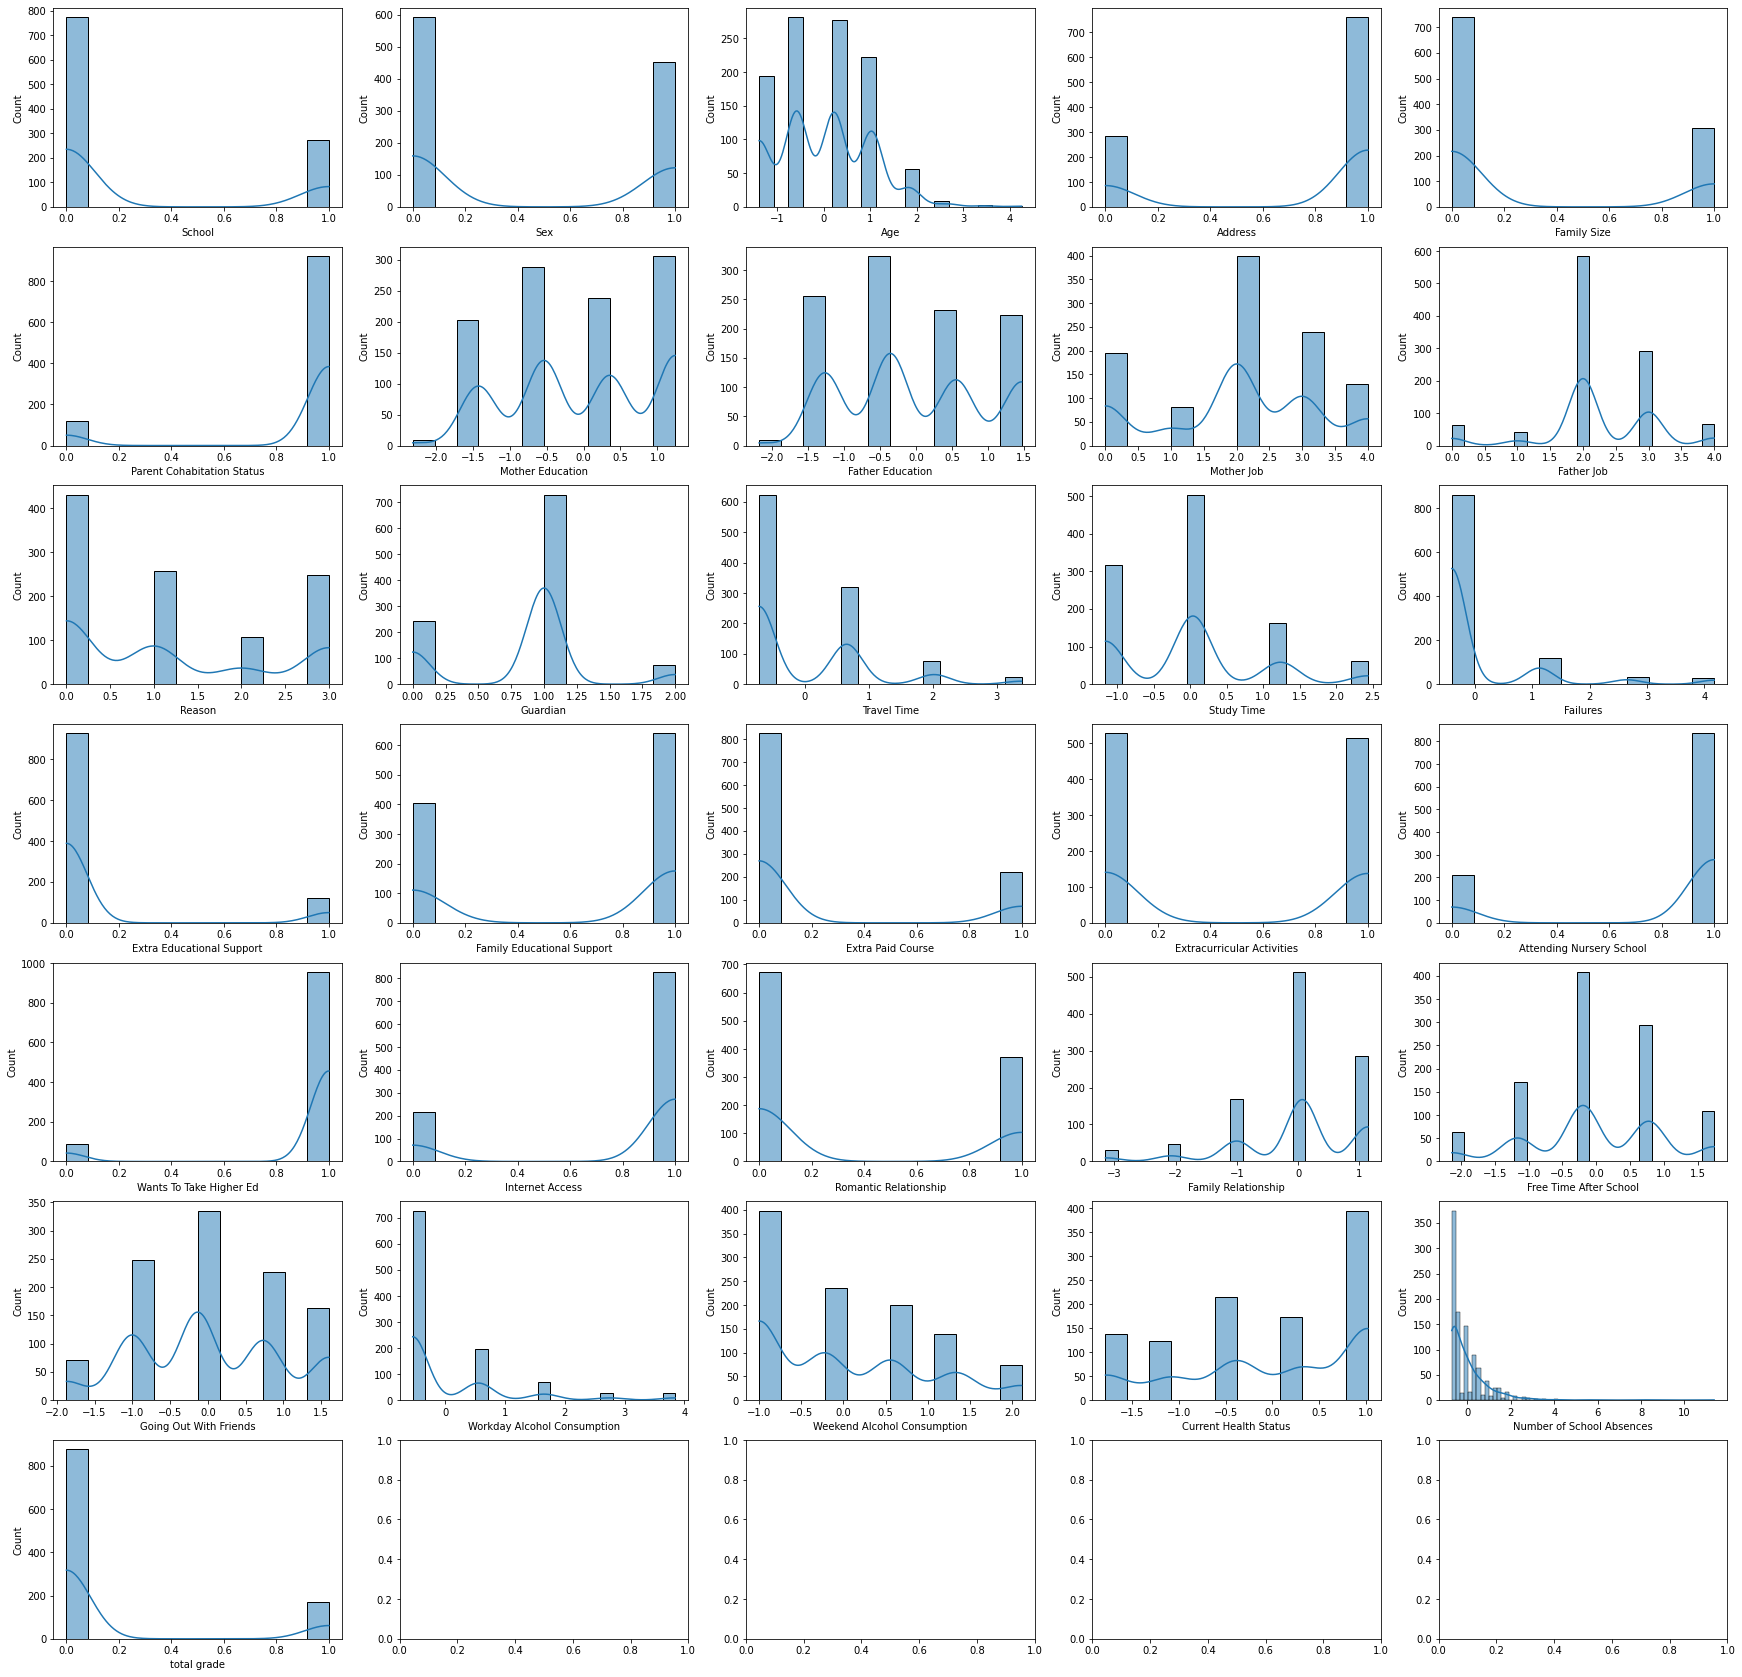

In [ ]:
fig, axes = plt.subplots(ncols = 5, nrows = 7, figsize = (30,30))
index = 0
ax = axes.flatten()

for col, value in df.items():
    sns.histplot(df[col],kde=True, ax=ax[index])
    index += 1


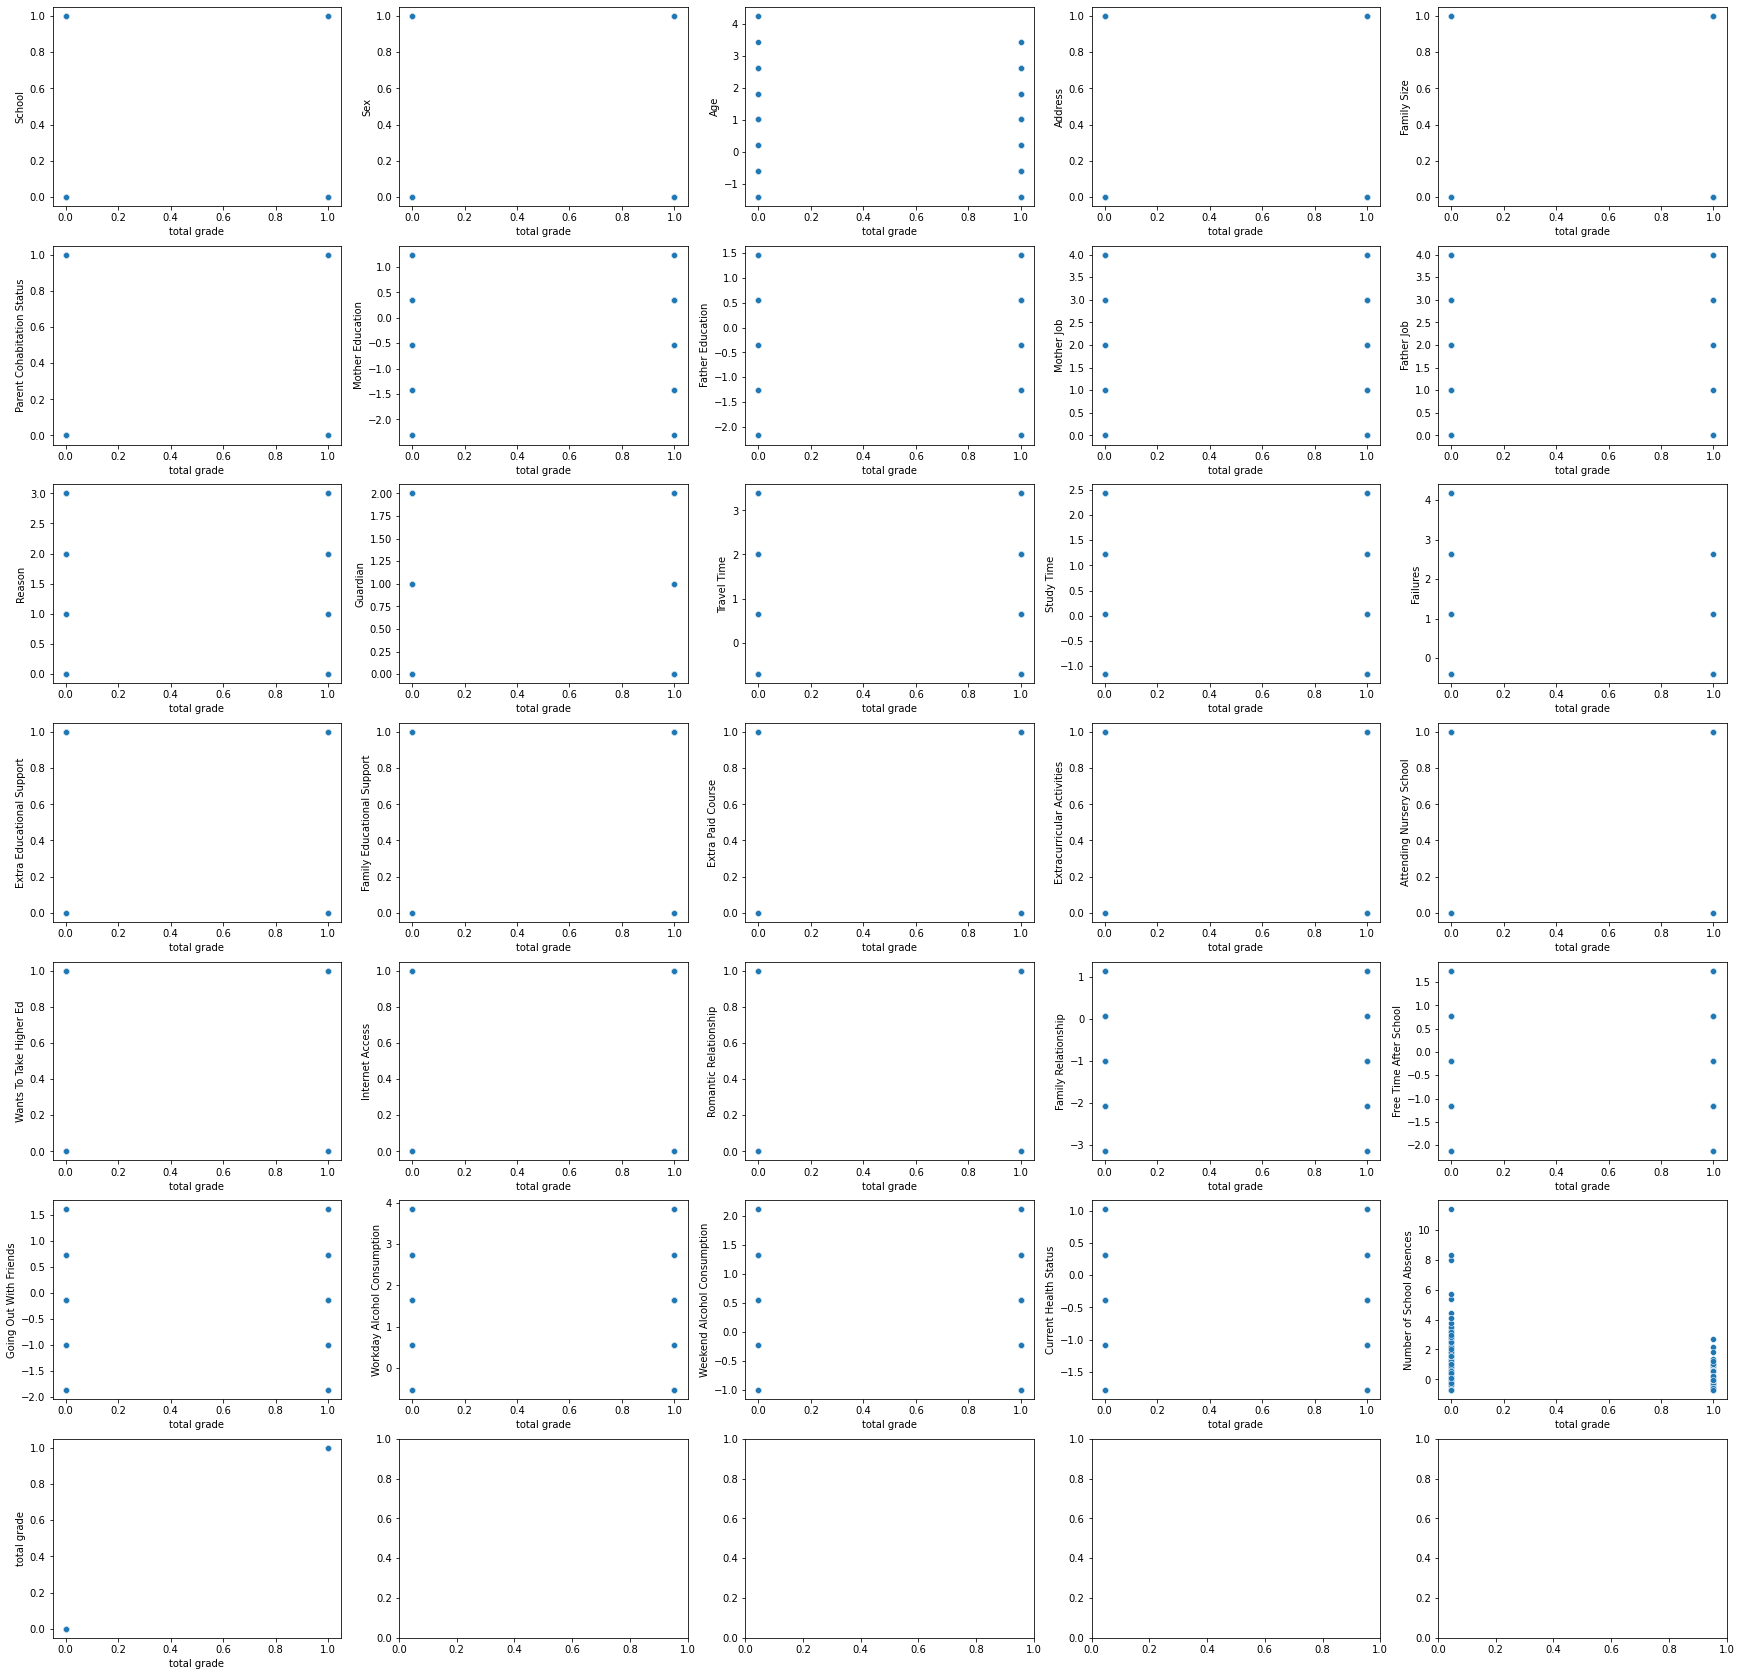

In [ ]:
fig, axes = plt.subplots(ncols = 5, nrows = 7, figsize = (30, 30))
index = 0
ax = axes.flatten()

for col, value in df.items():
    sns.scatterplot(x=df['total grade'], y=df[col],ax=ax[index])
    index += 1


In [ ]:
df


,School,Sex,Age,Address,Family Size,Parent Cohabitation Status,Mother Education,Father Education,Mother Job,Father Job,...,Internet Access,Romantic Relationship,Family Relationship,Free Time After School,Going Out With Friends,Workday Alcohol Consumption,Weekend Alcohol Consumption,Current Health Status,Number of School Absences,total grade
0,0,0,1.027889,1,0,0,1.242077,1.466302,0,4,...,0,0,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,-0.070060,0.0
1,0,0,0.221035,1,0,1,-1.426089,-1.262431,0,2,...,1,0,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.392275,0.0
2,0,0,-1.392674,1,1,1,-1.426089,-1.262431,0,2,...,1,0,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.252155,0.0
3,0,0,-1.392674,1,0,1,1.242077,-0.352853,1,3,...,1,1,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.714489,0.0
4,0,0,-0.585820,1,0,1,0.352689,0.556724,2,2,...,0,0,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.714489,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,2.641599,1,1,0,-0.536700,-0.352853,3,3,...,0,0,1.140653,1.744741,0.732511,2.749708,2.114083,0.320850,1.057691,0.0
391,1,1,0.221035,1,1,1,0.352689,-1.262431,3,3,...,1,0,-2.074941,0.774821,1.600550,1.652347,1.335564,-1.083624,-0.231167,0.0
392,1,1,3.448453,0,0,1,-1.426089,-1.262431,2,2,...,0,0,1.140653,1.744741,-0.135527,1.652347,0.557044,-0.381387,-0.231167,0.0
393,1,1,1.027889,0,1,1,0.352689,-0.352853,3,2,...,1,0,0.068788,0.774821,-1.871604,1.652347,1.335564,1.023086,-0.714489,0.0


In [ ]:
df.shape


(1044, 31)

In [ ]:
df.head()

,School,Sex,Age,Address,Family Size,Parent Cohabitation Status,Mother Education,Father Education,Mother Job,Father Job,...,Internet Access,Romantic Relationship,Family Relationship,Free Time After School,Going Out With Friends,Workday Alcohol Consumption,Weekend Alcohol Consumption,Current Health Status,Number of School Absences,total grade
0,0,0,1.027889,1,0,0,1.242077,1.466302,0,4,...,0,0,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,-0.070060,0.0
1,0,0,0.221035,1,0,1,-1.426089,-1.262431,0,2,...,1,0,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.392275,0.0
2,0,0,-1.392674,1,1,1,-1.426089,-1.262431,0,2,...,1,0,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.252155,0.0
3,0,0,-1.392674,1,0,1,1.242077,-0.352853,1,3,...,1,1,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.714489,0.0
4,0,0,-0.585820,1,0,1,0.352689,0.556724,2,2,...,0,0,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.714489,0.0


In [ ]:
for i in df.iloc[:,:]:
    df=df[df[i].between(df[i].quantile(0.05),df[i].quantile(0.95))]

In [ ]:
df.shape

(841, 31)

The column with outliers has been dropped

#P value test




1.   Null Hypothesis H0: The population correlation coefficient is significantly different from zero. There is a significant linear between the dependent and independent variables.
2.  Alternative Hypothesis Ha: The population correlation coefficient isn’t significantly different from zero. There is no significant linear relationship between the dependent and independent variables.



In [ ]:
from scipy import stats

In [ ]:

for col, value in df.items():
  r,p= stats.pearsonr(df[col],df['total grade'])
  print("The regression between" ,col, "and Total grade " "is", round(r,4))
  print("The p value between", col, "and Total grade " "is", round(p,10))
  if p<0.1:
    print('We reject H0. Which means  we accept {H1}')
  else:
    print('We fail to reject H0. Which means we accept {H0}')
  print('------------------------/////--------------------///-------------')

The regression between School and Total grade is 0.6073
The p value between School and Total grade is 0.0
We reject H0. Which means  we accept {H1}
------------------------/////--------------------///-------------
The regression between Sex and Total grade is -0.0589
The p value between Sex and Total grade is 0.0876478153
We reject H0. Which means  we accept {H1}
------------------------/////--------------------///-------------
The regression between Age and Total grade is 0.0817
The p value between Age and Total grade is 0.0177593661
We reject H0. Which means  we accept {H1}
------------------------/////--------------------///-------------
The regression between Address and Total grade is -0.2026
The p value between Address and Total grade is 3.1e-09
We reject H0. Which means  we accept {H1}
------------------------/////--------------------///-------------
The regression between Family Size and Total grade is 0.0529
The p value between Family Size and Total grade is 0.1253914185
We fa

In [ ]:
df.columns



Index(['School', 'Sex', 'Age', 'Address', 'Family Size',
       'Parent Cohabitation Status', 'Mother Education', 'Father Education',
       'Mother Job', 'Father Job', 'Reason', 'Guardian', 'Travel Time',
       'Study Time', 'Failures', 'Extra Educational Support',
       'Family Educational Support', 'Extra Paid Course',
       'Extracurricular Activities', 'Attending Nursery School',
       'Wants To Take Higher Ed', 'Internet Access', 'Romantic Relationship',
       'Family Relationship', 'Free Time After School',
       'Going Out With Friends', 'Workday Alcohol Consumption',
       'Weekend Alcohol Consumption', 'Current Health Status',
       'Number of School Absences', 'total grade'],
      dtype='object')

'Family Size','Parent Cohabitation Status', 'Father Job', 'Reason', 'Study Time', 'Family Educational Support', 'Attending Nursery School','Family Relationship', 'Free Time After School', 'Workday Alcohol Consumption',
       'Weekend Alcohol Consumption', 'Wants To Take Higher Ed','Current Health Status'
       have p value greater than 0.1

In [ ]:
df_new=df.drop(['School', 'Sex', 'Age', 'Address', 'Mother Education', 'Father Education',
       'Mother Job',  'Reason', 'Guardian', 'Travel Time',
        'Failures', 'Extra Educational Support',
        'Extra Paid Course',
       'Extracurricular Activities', 
        'Internet Access', 'Romantic Relationship',
       'Family Relationship', 'Free Time After School',
       'Going Out With Friends',  
       'Number of School Absences'],axis=1,inplace=True)

In [ ]:
df

,Family Size,Parent Cohabitation Status,Father Job,Study Time,Family Educational Support,Attending Nursery School,Wants To Take Higher Ed,Workday Alcohol Consumption,Weekend Alcohol Consumption,Current Health Status,total grade
0,0,0,4,0.035606,0,1,1,-0.542374,-0.999995,-0.381387,0.0
1,0,1,2,0.035606,1,0,1,-0.542374,-0.999995,-0.381387,0.0
2,1,1,2,0.035606,0,1,1,0.554987,0.557044,-0.381387,0.0
3,0,1,3,1.234713,1,1,1,-0.542374,-0.999995,1.023086,0.0
4,0,1,2,0.035606,1,1,1,-0.542374,-0.221475,1.023086,0.0
...,...,...,...,...,...,...,...,...,...,...,...
387,0,1,2,1.234713,0,0,1,-0.542374,-0.221475,1.023086,0.0
388,1,1,3,0.035606,1,1,1,-0.542374,-0.999995,-1.785861,0.0
391,1,1,3,-1.163502,0,0,1,1.652347,1.335564,-1.083624,0.0
393,1,1,2,-1.163502,0,0,1,1.652347,1.335564,1.023086,0.0


In [ ]:
x = df.drop('total grade', axis=1)
y = df['total grade']

In [ ]:
x.shape

(841, 10)

In [ ]:
y.shape

(841,)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
x_train.shape

(672, 10)

In [ ]:
y_train.shape

(672,)

In [ ]:
x_test.shape

(169, 10)

In [ ]:
y_test.shape

(169,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 0.01824725, -0.00999578, -0.00529185, -0.0161918 , -0.0221436 ,
       -0.00840034, -0.07949125,  0.00357519,  0.02041893, -0.01446374])

In [ ]:
model.intercept_

0.26397866426951844

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
residual=y_test-y_pred

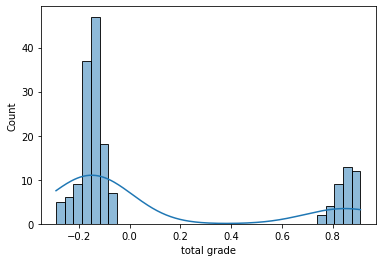

In [ ]:
import seaborn as sns
sns.histplot(residual, kde=True)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_absolute_error(y_test,y_pred)

0.31556074153212443

In [ ]:
mean_squared_error(y_test,y_pred)

0.18919018442310115

In [ ]:
from sklearn.model_selection import cross_validate
model=LinearRegression()

In [ ]:
scores= cross_validate(estimator=model,X=x, y=y, scoring='neg_mean_squared_error',cv=5)

In [ ]:
scores

{'fit_time': array([0.01538134, 0.00411272, 0.00448132, 0.00372982, 0.0044353 ]),
 'score_time': array([0.00265384, 0.00279689, 0.00267053, 0.00298786, 0.00257134]),
 'test_score': array([-0.04252891, -0.06833806, -0.64843498, -0.09105613, -0.04877471])}

In [ ]:
import numpy as np
np.mean(-scores['test_score'])

0.1798265595588187